# <center> Data Visualization - Level 1 - Part 2
Source: https://www.kaggle.com/learn/data-visualisation
### Plotting with Seaborn
Source: https://www.kaggle.com/residentmario/plotting-with-seaborn

In [1]:
import pandas as pd
reviews = pd.read_csv('Data/Visualizations/winemag-data_first150k.csv', index_col=0)
import seaborn as sns

### Countplot

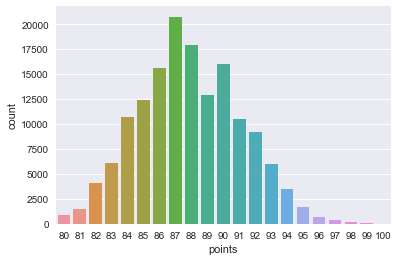

In [3]:
%matplotlib inline
sns.countplot(reviews['points'])

### KDE Plot

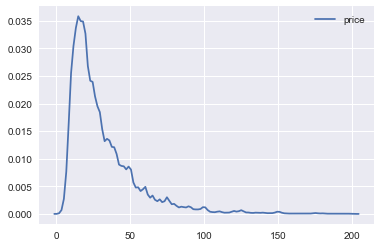

In [5]:
sns.kdeplot(reviews.query('price < 200').price)

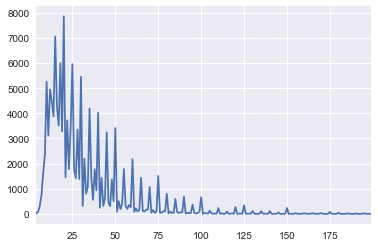

In [6]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

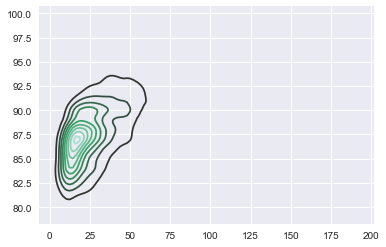

In [7]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:,['price','points']].dropna().sample(5000))

### Distplot

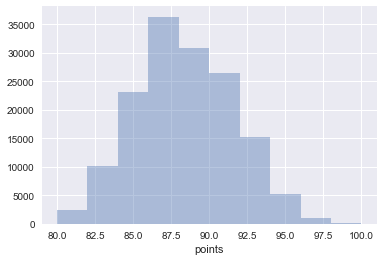

In [11]:
sns.distplot(reviews['points'], bins=10, kde=False)

### Scatterplot and hexplot

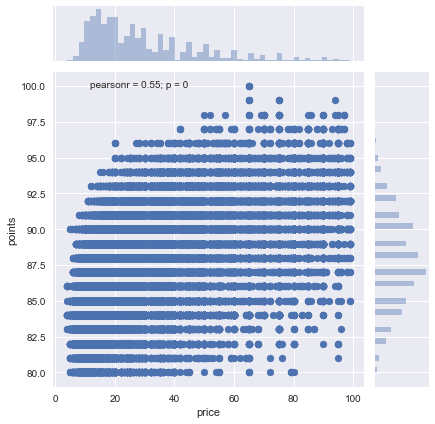

In [12]:
sns.jointplot(x='price',y='points', 
              data=reviews[reviews['price']<100])

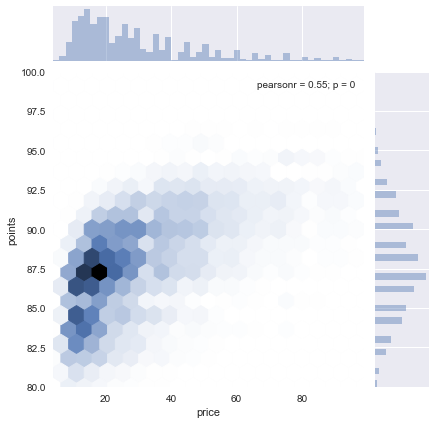

In [14]:
sns.jointplot(x='price',y='points', 
              data=reviews[reviews['price']<100],
             kind='hex', gridsize=20)

### Boxplot and Violin Plot

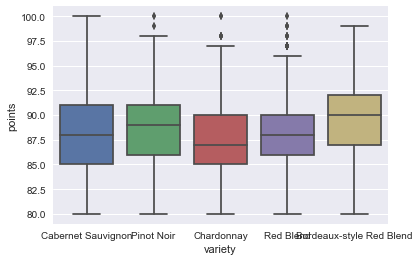

In [15]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(x='variety',y='points', data=df)

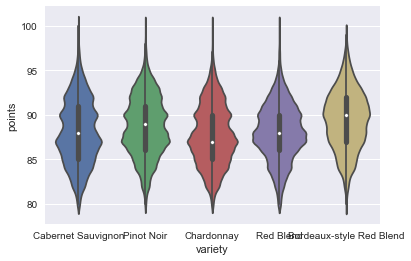

In [18]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)

### Example

In [19]:
pokemon = pd.read_csv('Data/Visualizations/pokemon.csv', index_col=0)
pokemon.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
abilities,,,,,,,,,,,,,,,,,,,,,
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,88.1,3,122,120,80,grass,poison,100.0,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


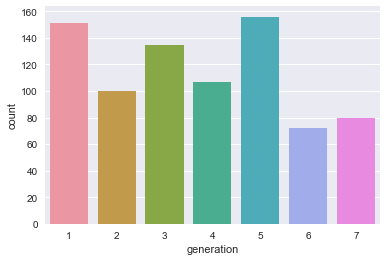

In [22]:
sns.countplot(data = pokemon, x='generation')

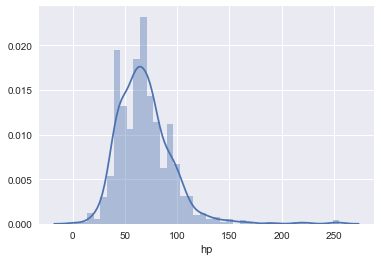

In [30]:
sns.distplot(pokemon.hp)

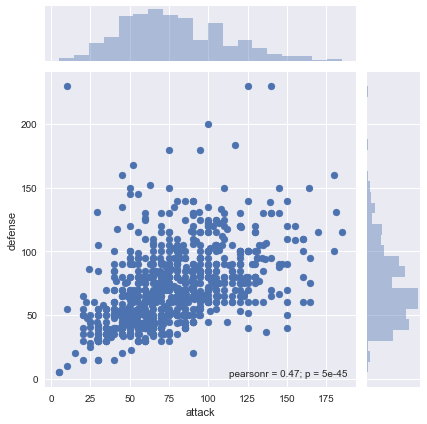

In [32]:
sns.jointplot(y='defense', x='attack', data=pokemon)

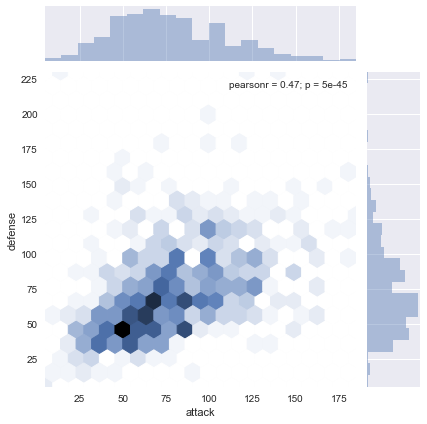

In [33]:
sns.jointplot(y='defense', x='attack', data=pokemon,
             kind='hex', gridsize=20)

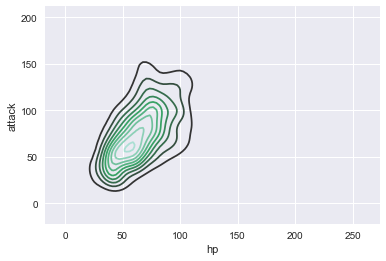

In [38]:
sns.kdeplot(pokemon.hp, pokemon.attack)

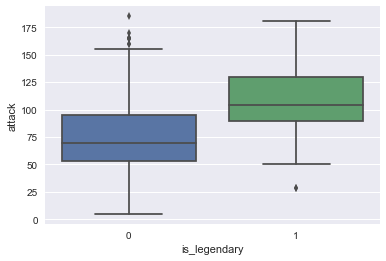

In [42]:
sns.boxplot(y='attack', x='is_legendary', data=pokemon)

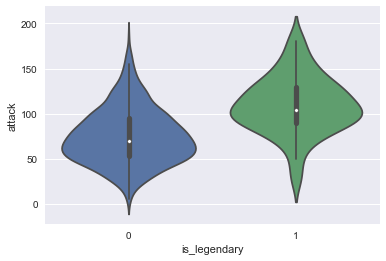

In [44]:
sns.violinplot(y='attack', x='is_legendary', data=pokemon)

# <center> Faceting with seaborn
Source: https://www.kaggle.com/residentmario/faceting-with-seaborn

In [45]:
import pandas as pd
pd.set_option('max_columns', None)
df = pd.read_csv("Data/Visualizations/CompleteDataset.csv", index_col=0)

import re
import numpy as np

footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

/Users/Kavi/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


In [47]:
import seaborn as sns

### The FacetGrid

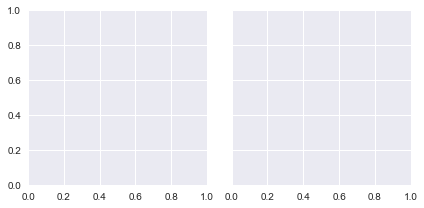

In [48]:
df = footballers[footballers['Position'].isin(['ST','GK'])]
g = sns.FacetGrid(df, col='Position')

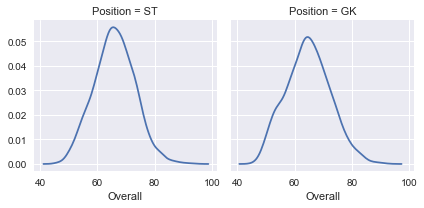

In [49]:
df = footballers[footballers['Position'].isin(['ST','GK'])]
g = sns.FacetGrid(df, col='Position')
g.map(sns.kdeplot,'Overall')

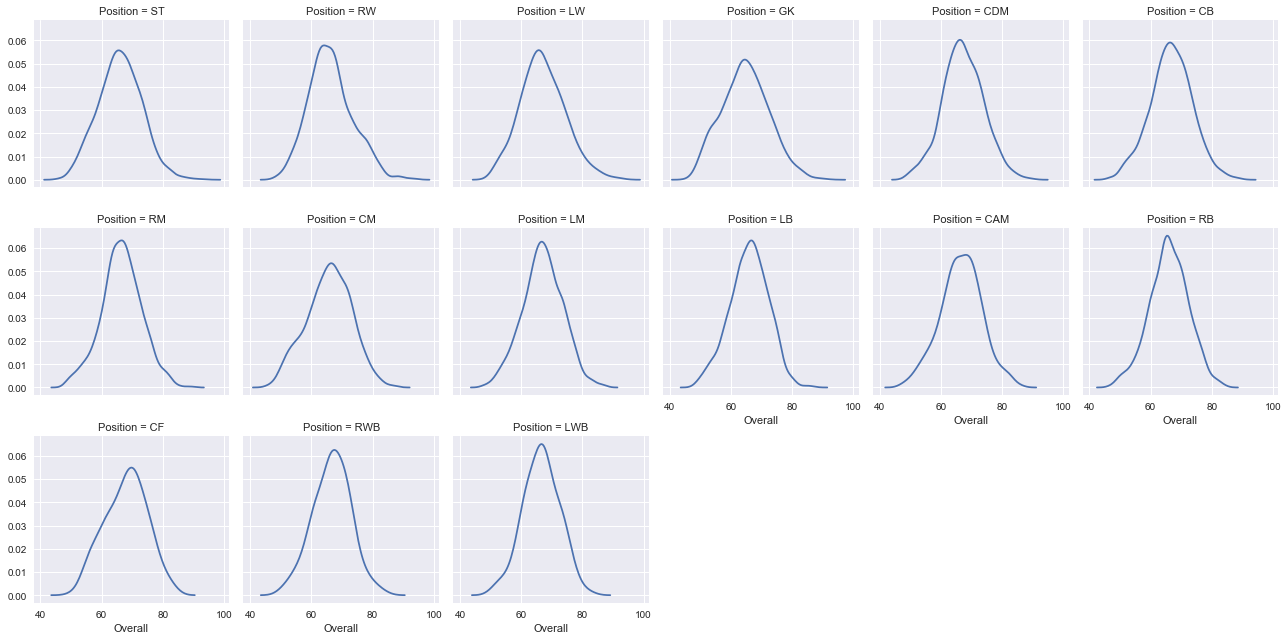

In [50]:
df = footballers

g = sns.FacetGrid(df, col='Position', col_wrap=6)
g.map(sns.kdeplot, 'Overall')

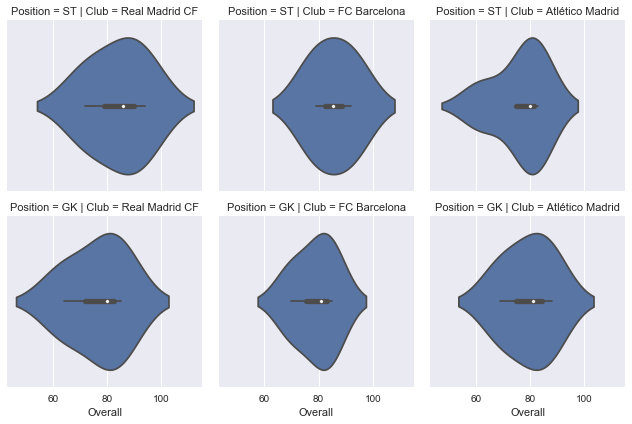

In [51]:
df = footballers[footballers['Position'].isin(['ST','GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df ,row='Position', col='Club')
g.map(sns.violinplot, 'Overall')

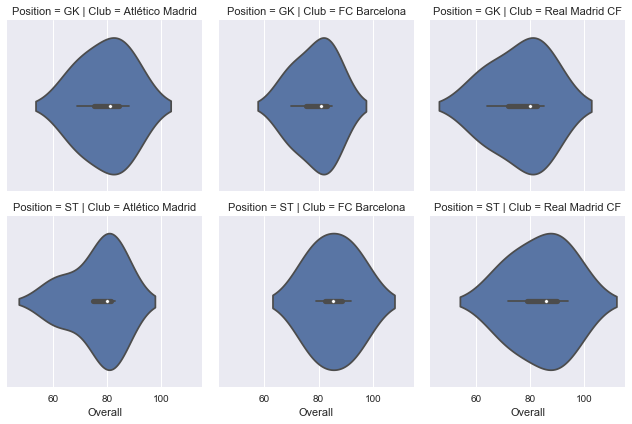

In [52]:
# Ordering Facet Grid
df = footballers[footballers['Position'].isin(['ST','GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df ,row='Position', col='Club',
                 row_order=['GK','ST'],
                 col_order=['Atlético Madrid', 'FC Barcelona', 'Real Madrid CF']
                 )
g.map(sns.violinplot, 'Overall')

### Pairplot

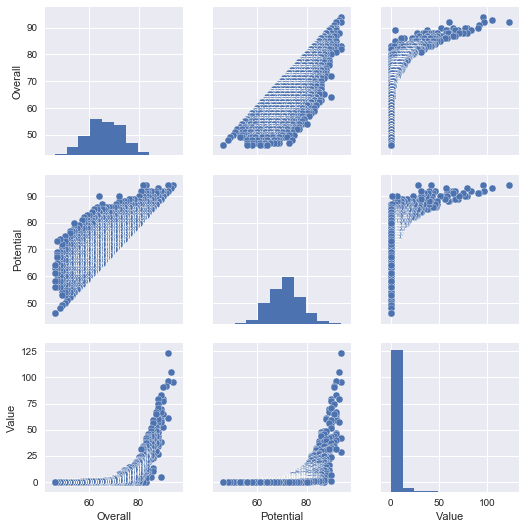

In [54]:
sns.pairplot(footballers[['Overall','Potential','Value']])

### Examples

In [55]:
import pandas as pd
import seaborn as sns

pokemon = pd.read_csv('Data/Visualizations/pokemon.csv', index_col=0)
pokemon.head(3)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
abilities,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
